In [2]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = datasets.load_iris() #load dataset

In [5]:
data.feature_names,data.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [6]:
X = data.data
Y = data.target
X.shape, Y.shape

((150, 4), (150,))

In [7]:
#Normalize dataset
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
#Encode target classes
ec = OneHotEncoder()
Y = ec.fit_transform(Y.reshape(-1,1)).toarray()

In [9]:
X.shape,Y.shape

((150, 4), (150, 3))

In [10]:
n_feature = X.shape[-1]
n_class = Y.shape[-1]

In [11]:
#build model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(n_feature)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(n_class, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

In [13]:
#Train model
history = model.fit(
    X, Y,
    batch_size=64, epochs=50,
    verbose=1
)

Epoch 1/50
3/3 [==============================] - 0s 2ms/step - loss: 1.0665 - accuracy: 0.3733
Epoch 2/50
3/3 [==============================] - 0s 1ms/step - loss: 0.6203 - accuracy: 0.8333
Epoch 3/50
3/3 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.8467
Epoch 4/50
3/3 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8667
Epoch 5/50
3/3 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.9000
Epoch 6/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.8867
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.9000
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2211 - accuracy: 0.9133
Epoch 9/50
3/3 [==============================] - 0s 3ms/step - loss: 0.1952 - accuracy: 0.9267
Epoch 10/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9400
Epoch 11/50
3/3 [======================

Text(0.5, 0, 'Epoch')

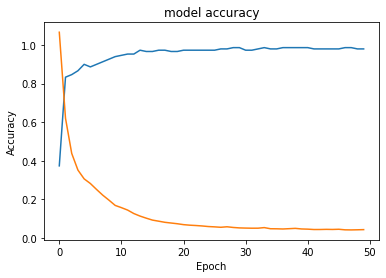

In [14]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")